In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from scipy.stats import ttest_ind

In [2]:
df = pd.read_excel('Новый диплом датасет.xlsx', sheet_name=['Данные','Clients','Region_dict'])

In [3]:
df['Данные']

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
37984,297586,NaN,NaN,NaN
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726000
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734000
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073000


In [4]:
df['Clients']

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [5]:
df['Region_dict']

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [6]:
df['Данные'].isnull().sum()

id_order          0
id_client       588
amt_payment    2144
dtime_pay      2161
dtype: int64

In [7]:
df['Clients'].isnull().sum()

id_client             0
dtime_ad            249
nflag_test            0
id_trading_point      0
dtype: int64

In [8]:
df_d = df['Данные'].dropna()

In [9]:
df_client = df['Clients'].dropna()

In [10]:
df_client.isnull().sum()

id_client           0
dtime_ad            0
nflag_test          0
id_trading_point    0
dtype: int64

In [11]:
# Отчистили и избавились от нуловых значений,именно избавились так как нуловые значения в столбце размер платежа может сильно влиять на картину в целом


Text(0.5, 1.0, 'Распределение торговых точек по городам')

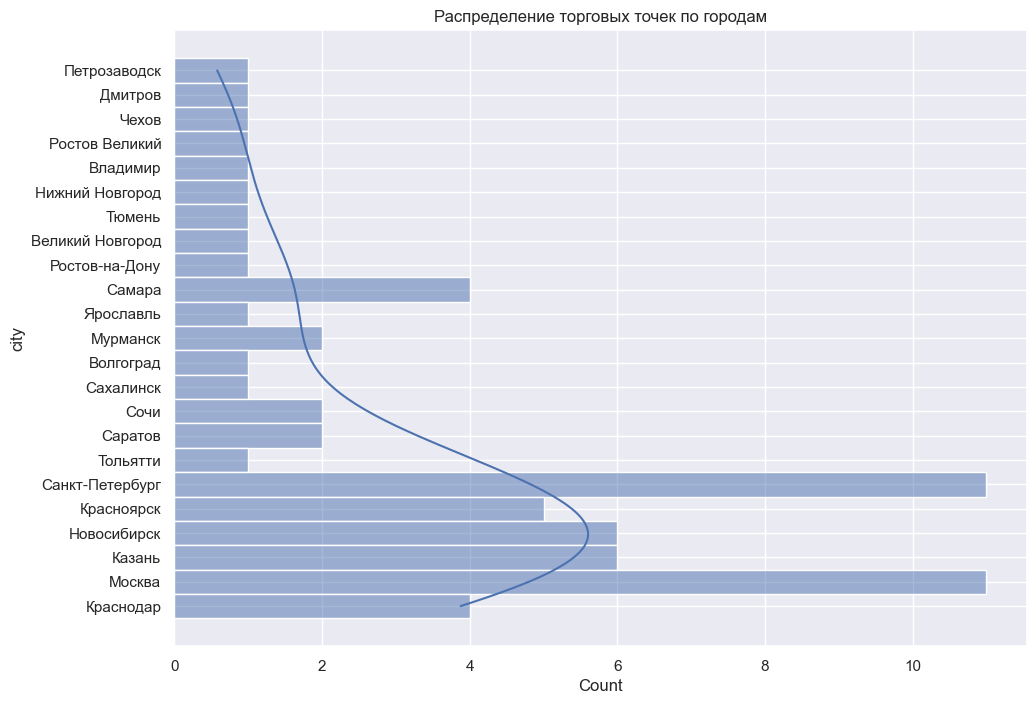

In [12]:
sns.set(rc={'figure.figsize':(11,8)})
sns.histplot(data=df['Region_dict'], y="city", kde = True, binwidth=.9)
plt.title('Распределение торговых точек по городам')

In [13]:
df_d

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221000
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992000
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744000
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437000
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468000
...,...,...,...,...
37983,297572,195257.0,2191.0,2022-08-21 18:31:51.585000
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726000
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734000
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073000


In [14]:
client_pay = df_d.groupby('id_client')['amt_payment'].sum()

In [15]:
client_pay

id_client
178561.0    3052.0
178562.0    2439.0
178563.0     768.0
178565.0     958.0
178566.0    5474.0
             ...  
209630.0    6927.0
209631.0    2090.0
209632.0    2775.0
209633.0    1673.0
209634.0    2504.0
Name: amt_payment, Length: 28600, dtype: float64

In [16]:
client_pay_inner = pd.merge(df_client, client_pay, 
         left_on='id_client', right_on='id_client', how='left')

In [17]:
client_pay_inner

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment
0,180844,2022-06-08 18:38:41.414,0,212,5349.0
1,226069,2022-07-11 16:28:38.511,1,54,NaN
2,183981,2022-06-16 12:23:59.289,1,991,6322.0
3,322530,2022-07-08 08:56:08.714,0,1015,NaN
4,254313,2022-06-19 22:18:01.770,1,453,NaN
...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0
55352,244069,2022-08-08 00:12:31.319,1,991,NaN
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0


In [18]:
client_pay_inner = pd.merge(client_pay_inner, df['Region_dict'], 
         left_on='id_trading_point', right_on='id_trading_point', how='left')
client_pay_inner

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск
1,226069,2022-07-11 16:28:38.511,1,54,NaN,Мурманск
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань
3,322530,2022-07-08 08:56:08.714,0,1015,NaN,Краснодар
4,254313,2022-06-19 22:18:01.770,1,453,NaN,Санкт-Петербург
...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар
55352,244069,2022-08-08 00:12:31.319,1,991,NaN,Казань
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург


In [19]:
client_pay_inner['amt_payment'] = client_pay_inner['amt_payment'].fillna(0)
client_pay_inner

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург
...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург


In [20]:
client_pay_inner.loc[client_pay_inner['amt_payment'] > 0, 'flag']=1
client_pay_inner

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1.0
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,NaN
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1.0
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар,NaN
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,NaN
...,...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар,1.0
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,NaN
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1.0
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1.0


In [21]:
client_pay_inner['flag'] = client_pay_inner['flag'].fillna(0)
client_pay_inner

,id_client,dtime_ad,nflag_test,id_trading_point,amt_payment,city,flag
0,180844,2022-06-08 18:38:41.414,0,212,5349.0,Красноярск,1.0
1,226069,2022-07-11 16:28:38.511,1,54,0.0,Мурманск,0.0
2,183981,2022-06-16 12:23:59.289,1,991,6322.0,Казань,1.0
3,322530,2022-07-08 08:56:08.714,0,1015,0.0,Краснодар,0.0
4,254313,2022-06-19 22:18:01.770,1,453,0.0,Санкт-Петербург,0.0
...,...,...,...,...,...,...,...
55351,193038,2022-07-09 00:31:25.196,0,1015,5846.0,Краснодар,1.0
55352,244069,2022-08-08 00:12:31.319,1,991,0.0,Казань,0.0
55353,189084,2022-06-29 04:34:42.610,1,439,7146.0,Казань,1.0
55354,182758,2022-06-13 11:28:37.856,1,573,13720.0,Санкт-Петербург,1.0


In [22]:
def test_calc (r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1,r2)
    print(s)
    print(p)
    if (p > alpha):
        print('Разница не существенна')
    else:
        print('Разница есть')

In [23]:
test_calc(client_pay_inner[client_pay_inner['nflag_test']==0]['amt_payment'], client_pay_inner[client_pay_inner['nflag_test']==1]['amt_payment'])

-6.400366267700368
1.5624051059175334e-10
Разница есть


In [24]:
def mann_whitney_func (r1, r2, alpha = 0.05):
    man, p_value = stats.mannwhitneyu(r1, r2, alternative = 'two-sided')
    if p_value > alpha :
        print('Распределния равны')
    else:
        print('Распределения не равны')
    return man, p_value

In [25]:
mann_whitney_func(client_pay_inner[client_pay_inner['nflag_test']==0]['amt_payment'], client_pay_inner[client_pay_inner['nflag_test']==1]['amt_payment'])

Распределения не равны


(370074960.5, 5.082016727027916e-10)

In [26]:
#Сравнил средние чеки контрольной и тесотовой групп. Нулевая гипотеза отвергается

In [27]:
zero_payment_points = []

for i in client_pay_inner['id_trading_point'].unique():

    df_loc = client_pay_inner[client_pay_inner['id_trading_point']==i]
    sum_a = client_pay_inner[(client_pay_inner['id_trading_point']==i) & (client_pay_inner['nflag_test']==0)]['amt_payment'].sum()
    sum_b = client_pay_inner[(client_pay_inner['id_trading_point']==i) & (client_pay_inner['nflag_test']==1)]['amt_payment'].sum()
    if (sum_a == 0) | (sum_b == 0):
        zero_payment_points.append(i)

print(zero_payment_points)

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]


In [28]:
empty_group_points = []

for i in client_pay_inner['id_trading_point'].unique():
    
    c_a = client_pay_inner[(client_pay_inner['id_trading_point'] == i) & (client_pay_inner['nflag_test'] == 0)].count()['id_client']
    c_b = client_pay_inner[(client_pay_inner['id_trading_point'] == i) & (client_pay_inner['nflag_test'] == 1)].count()['id_client']
    if (c_a == 0) | (c_b == 0):
        empty_group_points.append(i)
        
print( empty_group_points)

[1015, 866, 1099, 739, 228, 603, 810, 800]


In [29]:
client_pay_inner = client_pay_inner.set_index('id_trading_point')
client_pay_inner

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
1015,322530,2022-07-08 08:56:08.714,0,0.0,Краснодар,0.0
453,254313,2022-06-19 22:18:01.770,1,0.0,Санкт-Петербург,0.0
...,...,...,...,...,...,...
1015,193038,2022-07-09 00:31:25.196,0,5846.0,Краснодар,1.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0
439,189084,2022-06-29 04:34:42.610,1,7146.0,Казань,1.0


In [30]:
client_pay_inner.drop([1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13],axis = 0, inplace = True)


In [31]:
client_pay_inner

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
453,254313,2022-06-19 22:18:01.770,1,0.0,Санкт-Петербург,0.0
2652,195818,2022-07-16 01:30:59.088,1,4021.0,Москва,1.0
...,...,...,...,...,...,...
453,188702,2022-06-28 06:16:25.664,0,1323.0,Санкт-Петербург,1.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0
439,189084,2022-06-29 04:34:42.610,1,7146.0,Казань,1.0


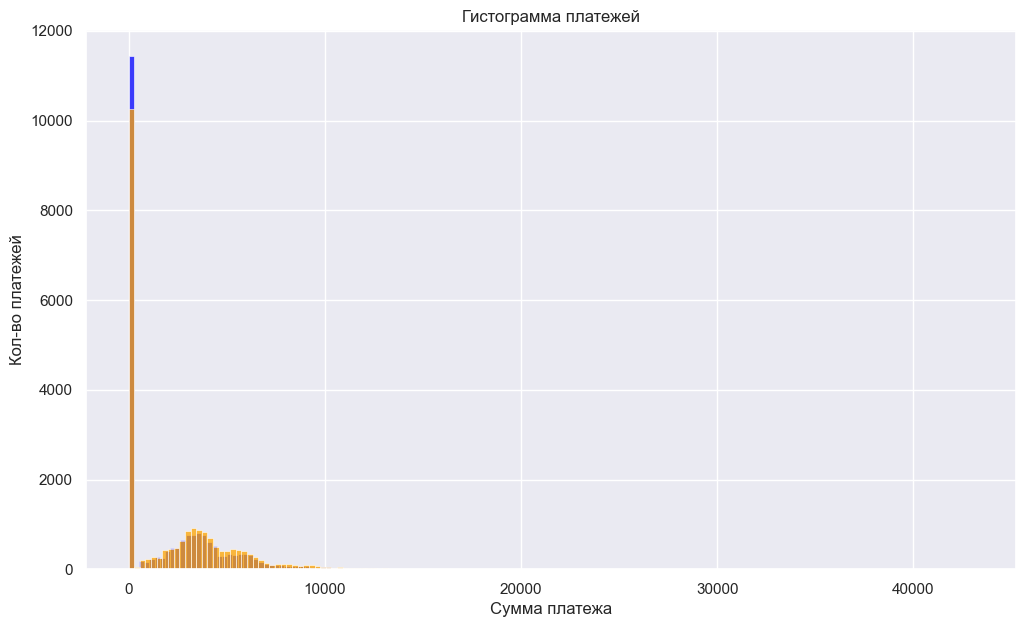

In [32]:
sns.set(rc={'figure.figsize':(12,7)})
sns.histplot(client_pay_inner[client_pay_inner['nflag_test']==0]['amt_payment'], color='blue', label = 'Контрольная группа')
sns.histplot(client_pay_inner[client_pay_inner['nflag_test']==1]['amt_payment'], color='orange', label = 'Тестовая группа')
plt.xlabel('Сумма платежа')
plt.ylabel('Кол-во платежей')
plt.title('Гистограмма платежей')
plt.show()

In [33]:
test_calc(client_pay_inner[client_pay_inner['nflag_test']==0]['amt_payment'], client_pay_inner[client_pay_inner['nflag_test']==1]['amt_payment'])

-9.456798235171377
3.3214645838934018e-21
Разница есть


In [34]:
mann_whitney_func(client_pay_inner[client_pay_inner['nflag_test']==0]['amt_payment'], client_pay_inner[client_pay_inner['nflag_test']==1]['amt_payment'])

Распределения не равны


(243344369.0, 3.008345273971901e-24)

In [35]:
client_pay_mean = client_pay_inner.groupby('nflag_test')['amt_payment'].mean()

In [36]:
client_pay_mean

nflag_test
0    2189.188432
1    2452.277345
Name: amt_payment, dtype: float64

In [37]:
test_calc(client_pay_inner[client_pay_inner['nflag_test']==0]['flag'], client_pay_inner[client_pay_inner['nflag_test']==1]['flag'])

-9.282032730948323
1.7338073027564523e-20
Разница есть


In [38]:
#Отчистил таблицу от ТТ, в которых не было потрачено ни рубля. Провел тесты test_calc и mann_whitney_func. Разница в средних платежах есть!

In [39]:
client_pay_inner


,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
453,254313,2022-06-19 22:18:01.770,1,0.0,Санкт-Петербург,0.0
2652,195818,2022-07-16 01:30:59.088,1,4021.0,Москва,1.0
...,...,...,...,...,...,...
453,188702,2022-06-28 06:16:25.664,0,1323.0,Санкт-Петербург,1.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0
439,189084,2022-06-29 04:34:42.610,1,7146.0,Казань,1.0


In [40]:
client_pay_inner

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
453,254313,2022-06-19 22:18:01.770,1,0.0,Санкт-Петербург,0.0
2652,195818,2022-07-16 01:30:59.088,1,4021.0,Москва,1.0
...,...,...,...,...,...,...
453,188702,2022-06-28 06:16:25.664,0,1323.0,Санкт-Петербург,1.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0
439,189084,2022-06-29 04:34:42.610,1,7146.0,Казань,1.0


In [41]:
client_pay_inner_M = client_pay_inner[client_pay_inner['city']=='Москва']
client_pay_inner_M

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
2652,195818,2022-07-16 01:30:59.088,1,4021.0,Москва,1.0
2652,274394,2022-06-25 00:46:07.492,1,0.0,Москва,0.0
6543,201373,2022-07-29 22:27:46.612,1,5009.0,Москва,1.0
2652,205352,2022-08-08 20:59:32.806,0,0.0,Москва,0.0
2652,185585,2022-06-20 12:40:52.026,0,0.0,Москва,0.0
...,...,...,...,...,...,...
9121,193774,2022-07-10 21:45:57.683,0,5851.0,Москва,1.0
2212,200450,2022-07-27 13:37:21.523,0,2989.0,Москва,1.0
1654,273340,2022-07-19 11:15:52.553,1,0.0,Москва,0.0


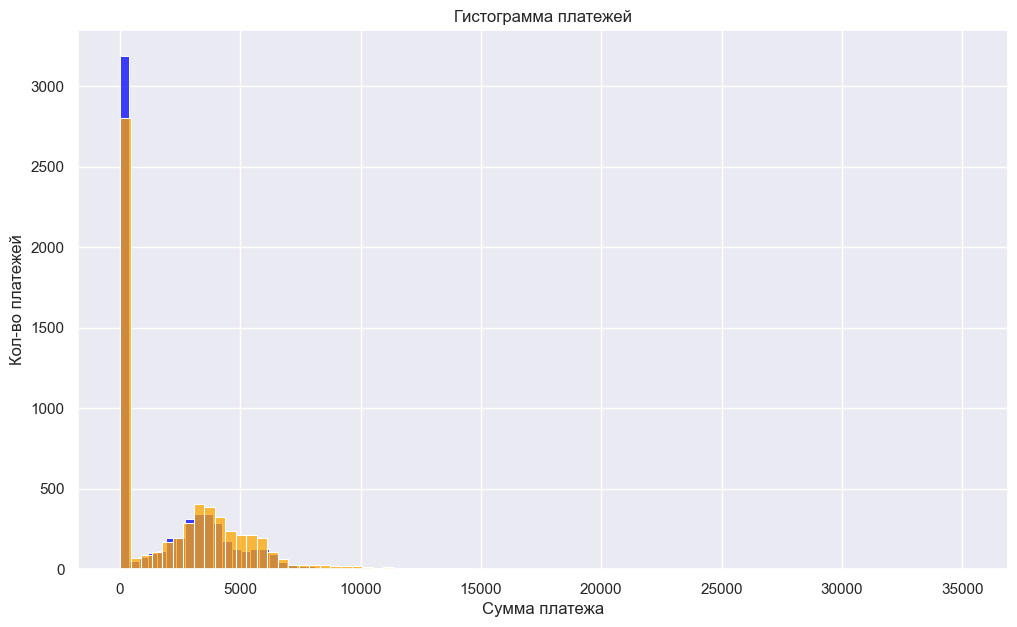

In [42]:
sns.set(rc={'figure.figsize':(12,7)})
sns.histplot(client_pay_inner_M[client_pay_inner_M['nflag_test']==0]['amt_payment'], color='blue', label = 'Контрольная группа')
sns.histplot(client_pay_inner_M[client_pay_inner_M['nflag_test']==1]['amt_payment'], color='orange', label = 'Тестовая группа')
plt.xlabel('Сумма платежа')
plt.ylabel('Кол-во платежей')
plt.title('Гистограмма платежей')
plt.show()

In [43]:
test_calc(client_pay_inner_M[client_pay_inner_M['nflag_test']==0 ]['amt_payment'], client_pay_inner_M[client_pay_inner_M['nflag_test']==1]['amt_payment'])

-7.676511027843395
1.757549439555765e-14
Разница есть


In [44]:
mann_whitney_func(client_pay_inner_M[client_pay_inner_M['nflag_test']==0]['amt_payment'], client_pay_inner_M[client_pay_inner_M['nflag_test']==1]['amt_payment'])

Распределения не равны


(17582441.5, 7.010591402203484e-16)

In [45]:
test_calc(client_pay_inner[client_pay_inner['nflag_test']==0]['flag'], client_pay_inner[client_pay_inner['nflag_test']==1]['flag'])

-9.282032730948323
1.7338073027564523e-20
Разница есть


In [46]:
#Провел тесты test_calc и mann_whitney_func в городе Москва. Разница в средних платежах есть!

In [47]:
client_pay_inner_SPB = client_pay_inner[client_pay_inner['city']=='Санкт-Петербург']
client_pay_inner_SPB

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
453,254313,2022-06-19 22:18:01.770,1,0.0,Санкт-Петербург,0.0
453,200225,2022-07-27 00:18:47.370,0,4372.0,Санкт-Петербург,1.0
453,205357,2022-08-08 21:22:23.684,0,2818.0,Санкт-Петербург,1.0
112,248371,2022-08-02 01:44:51.638,0,0.0,Санкт-Петербург,0.0
394,277149,2022-07-15 01:31:37.312,0,0.0,Санкт-Петербург,0.0
...,...,...,...,...,...,...
576,204576,2022-08-06 22:36:40.980,1,3552.0,Санкт-Петербург,1.0
117,186456,2022-06-22 16:06:03.632,0,9217.0,Санкт-Петербург,1.0
576,260405,2022-08-15 02:47:58.960,0,0.0,Санкт-Петербург,0.0


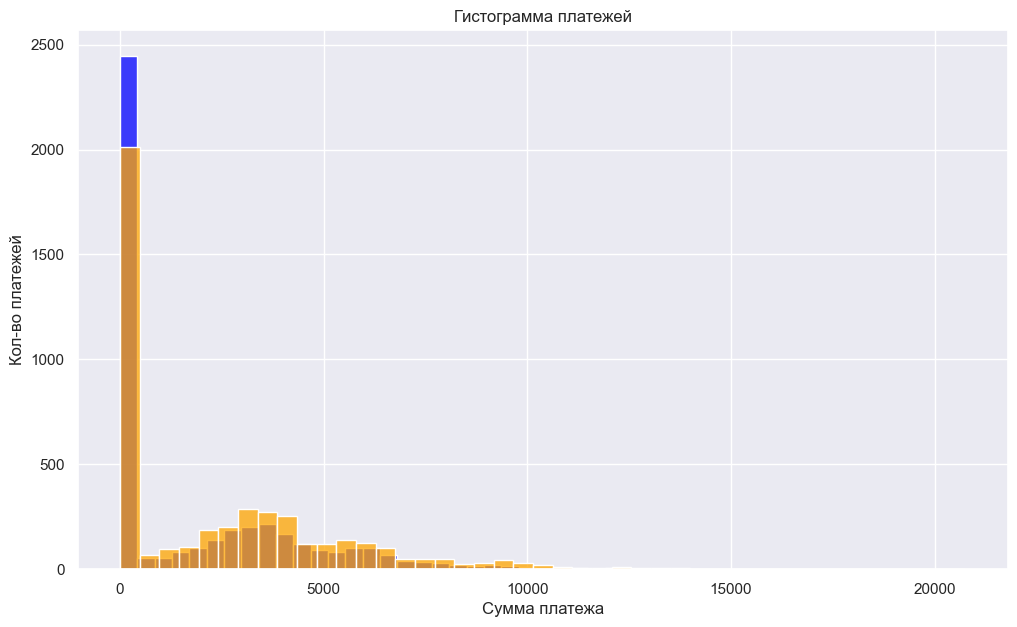

In [48]:
sns.set(rc={'figure.figsize':(12,7)})
sns.histplot(client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==0]['amt_payment'], color='blue', label = 'Контрольная группа')
sns.histplot(client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==1]['amt_payment'], color='orange', label = 'Тестовая группа')
plt.xlabel('Сумма платежа')
plt.ylabel('Кол-во платежей')
plt.title('Гистограмма платежей')
plt.show()

In [49]:
test_calc(client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==0 ]['amt_payment'], client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==1]['amt_payment'])

-8.759635784179547
2.3198088937974163e-18
Разница есть


In [50]:
mann_whitney_func(client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==0]['amt_payment'], client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==1]['amt_payment'])

Распределения не равны


(8809444.5, 2.0392184217953754e-20)

In [51]:
test_calc(client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==0]['flag'], client_pay_inner_SPB[client_pay_inner_SPB['nflag_test']==1]['flag'])

-9.352468686561785
1.065825659919673e-20
Разница есть


In [52]:
#Провел тесты test_calc и mann_whitney_func в городе Санкт-Петербург. Разница в средних платежах есть!

In [53]:
client_pay_inner_city= client_pay_inner[client_pay_inner['city']!='Санкт-Петербург']
client_pay_inner_city

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
2652,195818,2022-07-16 01:30:59.088,1,4021.0,Москва,1.0
2652,274394,2022-06-25 00:46:07.492,1,0.0,Москва,0.0
...,...,...,...,...,...,...
55,331831,2022-07-01 04:28:28.282,0,0.0,Мурманск,0.0
82,211355,2022-08-03 02:00:09.287,0,0.0,Саратов,0.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0


In [54]:
client_pay_inner_city= client_pay_inner_city[client_pay_inner_city['city']!='Москва']
client_pay_inner_city

,id_client,dtime_ad,nflag_test,amt_payment,city,flag
id_trading_point,,,,,,
212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
278,212625,2022-08-16 14:19:05.040,0,0.0,Красноярск,0.0
699,287462,2022-07-13 12:13:50.168,1,0.0,Казань,0.0
...,...,...,...,...,...,...
55,331831,2022-07-01 04:28:28.282,0,0.0,Мурманск,0.0
82,211355,2022-08-03 02:00:09.287,0,0.0,Саратов,0.0
991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0


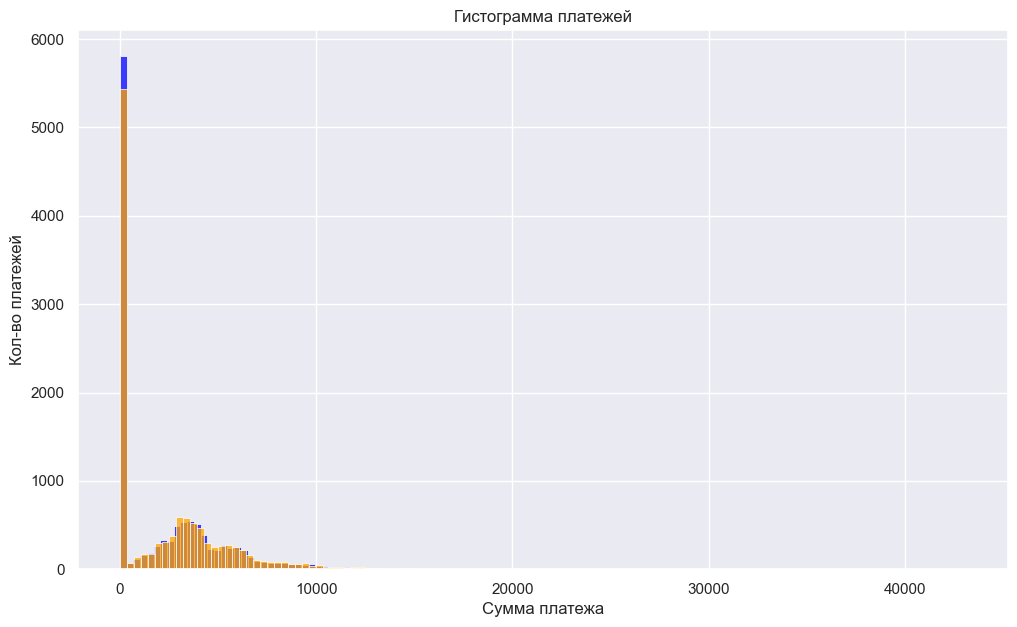

In [55]:
sns.set(rc={'figure.figsize':(12,7)})
sns.histplot(client_pay_inner_city[client_pay_inner_city['nflag_test']==0]['amt_payment'], color='blue', label = 'Контрольная группа')
sns.histplot(client_pay_inner_city[client_pay_inner_city['nflag_test']==1]['amt_payment'], color='orange', label = 'Тестовая группа')
plt.xlabel('Сумма платежа')
plt.ylabel('Кол-во платежей')
plt.title('Гистограмма платежей')
plt.show()

In [56]:
test_calc(client_pay_inner_city[client_pay_inner_city['nflag_test']==0 ]['amt_payment'], client_pay_inner_city[client_pay_inner_city['nflag_test']==1]['amt_payment'])

-2.799833948375294
0.005116960359573606
Разница есть


In [57]:
mann_whitney_func(client_pay_inner_city[client_pay_inner_city['nflag_test']==0]['amt_payment'], client_pay_inner_city[client_pay_inner_city['nflag_test']==1]['amt_payment'])

Распределения не равны


(71035036.5, 0.0049446987638856145)

In [58]:
test_calc(client_pay_inner_city[client_pay_inner_city['nflag_test']==0]['flag'], client_pay_inner_city[client_pay_inner_city['nflag_test']==1]['flag'])

-2.6871624139823846
0.007211139569659334
Разница есть


In [59]:
#Провел тесты test_calc и mann_whitney_func в оставшихся городах. Разница в средних платежах есть!

In [60]:
def test_calc(r1, r2, alpha = 0.05):

    s,p = ttest_ind(r1,r2)

    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
        print("Разница средних = ", r1.mean()-r2.mean())
    else:
        print("Гипотеза H0 подтверждается: средние равны")
        print("Разница средних = 0")

    return s, p

In [61]:
df_fin = client_pay_inner_city.reset_index()

In [62]:
df_fin

,id_trading_point,id_client,dtime_ad,nflag_test,amt_payment,city,flag
0,212,180844,2022-06-08 18:38:41.414,0,5349.0,Красноярск,1.0
1,54,226069,2022-07-11 16:28:38.511,1,0.0,Мурманск,0.0
2,991,183981,2022-06-16 12:23:59.289,1,6322.0,Казань,1.0
3,278,212625,2022-08-16 14:19:05.040,0,0.0,Красноярск,0.0
4,699,287462,2022-07-13 12:13:50.168,1,0.0,Казань,0.0
...,...,...,...,...,...,...,...
24076,55,331831,2022-07-01 04:28:28.282,0,0.0,Мурманск,0.0
24077,82,211355,2022-08-03 02:00:09.287,0,0.0,Саратов,0.0
24078,991,244069,2022-08-08 00:12:31.319,1,0.0,Казань,0.0
24079,439,189084,2022-06-29 04:34:42.610,1,7146.0,Казань,1.0


In [63]:
df_result = pd.DataFrame()

for i in df_fin['city'].unique():
    df_loc = df_fin[df_fin['city']==i]

    for j in df_loc['id_trading_point'].unique():

        df_loc_f      = df_loc[df_loc['id_trading_point']==j]

        count_test    = len(df_loc_f[df_loc_f['nflag_test']==1])
        count_control = len(df_loc_f[df_loc_f['nflag_test']==0])
        count_all     = count_test + count_control
        sigma_test    = df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'].std()
        sigma_control = df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'].std()

        avg_test    = np.mean(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'])
        avg_control = np.mean(df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        diff        = avg_test - avg_control

        s_a,p_a  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])
        s_p,p_p  = test_calc(df_loc_f[df_loc_f['nflag_test']==1]['flag'], df_loc_f[df_loc_f['nflag_test']==0]['flag'])
        m_s, m_p = mann_whitney_func(df_loc_f[df_loc_f['nflag_test']==1]['amt_payment'], df_loc_f[df_loc_f['nflag_test']==0]['amt_payment'])

        df_result = df_result._append({  'city':i, 'id_trading_point':j
                                        , 'count_test':count_test, 'count_control':count_control, 'count_all':count_all
                                        , 'avg_test':avg_test, 'avg_control':avg_control
                                        , 'sigma_test':sigma_test, 'sigma_control':sigma_control
                                        , 'diff':diff  , 'abs_ttest_s':s_a, 'abs_ttest_p':p_a, 'pr_ttest_s':s_p \
                                        #, 'pr_ttest_p':p_p,'mw_s':m_s,'mw_p':m_p
                                     }, ignore_index=True)

df_result['nflag_diff'] = np.where((df_result['abs_ttest_p'] < .05) & (df_result['diff'] > 0), 'Positive'
                                , np.where((df_result['abs_ttest_p'] < .05) & (df_result['diff'] < 0), 'Negative', 'No diff'))
df_result['percent_count'] = (df_result['count_all'] / df_result['count_all'].sum())

Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Распределния равны

In [64]:
df_result

,city,id_trading_point,count_test,count_control,count_all,avg_test,avg_control,sigma_test,sigma_control,diff,abs_ttest_s,abs_ttest_p,pr_ttest_s,nflag_diff,percent_count
0,Красноярск,212,593,575,1168,2144.317032,2222.052174,2708.588724,2785.116250,-77.735142,-0.483585,6.287709e-01,0.450975,No diff,0.048503
1,Красноярск,278,535,489,1024,2499.345794,2185.214724,2915.995329,2574.915597,314.131070,1.820268,6.901056e-02,0.822651,No diff,0.042523
2,Красноярск,202,551,565,1116,2927.341198,2730.378761,2956.686241,2737.885785,196.962437,1.155073,2.483083e-01,-0.625387,No diff,0.046344
3,Красноярск,444,650,562,1212,2404.106154,2545.734875,2810.828487,2797.138764,-141.628722,-0.876740,3.808017e-01,-0.748236,No diff,0.050330
4,Красноярск,277,708,709,1417,2285.750000,2431.365303,2712.677878,2868.587569,-145.615303,-0.981705,3.264128e-01,-0.344097,No diff,0.058843
5,Мурманск,54,633,640,1273,1702.714060,1688.512500,2565.132440,2628.012490,14.201560,0.097556,9.223005e-01,0.155600,No diff,0.052863
6,Мурманск,55,422,425,847,2109.106635,2111.272941,2790.993385,2804.223188,-2.166306,-0.011268,9.910125e-01,1.131579,No diff,0.035173
7,Казань,991,270,294,564,3249.281481,2452.986395,4719.592601,3633.935858,796.295087,2.255258,2.450100e-02,1.260334,Positive,0.023421
8,Казань,699,482,494,976,2422.286307,2574.352227,3906.817897,4082.851356,-152.065920,-0.594254,5.524804e-01,-1.514639,No diff,0.040530
9,Казань,477,382,386,768,2259.623037,2496.987047,3482.846094,3881.994719,-237.364010,-0.891593,3.728909e-01,-0.309729,No diff,0.031892


In [67]:
writer = pd.ExcelWriter('Калькулятор АБ теста.xlsx', engine='xlsxwriter')

df_result[df_result['nflag_diff']=='Positive'].to_excel(writer, sheet_name='Успешные ТТ', index = False)
df_result[df_result['nflag_diff']=='Negative'].to_excel(writer, sheet_name='Неуспешные ТТ', index = False)
df_result[df_result['nflag_diff']=='No diff'].to_excel(writer, sheet_name='Нет разницы', index = False)

writer.close()

In [66]:
pip install xlsxwriter

  Obtaining dependency information for xlsxwriter from https://files.pythonhosted.org/packages/a7/ea/53d1fe468e63e092cf16e2c18d16f50c29851242f9dd12d6a66e0d7f0d02/XlsxWriter-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/159.9 kB ? eta -:--:--
   ------- -------------------------------- 30.7/159.9 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/159.9 kB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 41.0/159.9 kB 1.9 MB/s eta 0:00:01
   -------------- ------------------------ 61.4/159.9 kB 469.7 kB/s eta 0:00:01
   -------------- ------------------------ 61.4/159.9 kB 46